In [3]:
import numpy as np     
import pandas as pd  
import seaborn as sns   
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans




In [5]:
try:
    from yellowbrick.cluster import KElbowVisualizer
    print("Yellowbrick imported successfully!")
except ImportError as e:
    print(f"ImportError: {e}")


Yellowbrick imported successfully!


In [6]:
from yellowbrick.cluster import KElbowVisualizer


In [7]:
data=pd.read_excel("ecom customer_data.xlsx")

In [8]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [9]:
data.copy()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [11]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [31]:
data.count()

Cust_ID                   30000
Gender                    27276
Orders                    30000
Jordan                    30000
Gatorade                  30000
Samsung                   30000
Asus                      30000
Udis                      30000
Mondelez International    30000
Wrangler                  30000
Vans                      30000
Fila                      30000
Brooks                    30000
H&M                       30000
Dairy Queen               30000
Fendi                     30000
Hewlett Packard           30000
Pladis                    30000
Asics                     30000
Siemens                   30000
J.M. Smucker              30000
Pop Chips                 30000
Juniper                   30000
Huawei                    30000
Compaq                    30000
IBM                       30000
Burberry                  30000
Mi                        30000
LG                        30000
Dior                      30000
Scabal                    30000
Tommy Hi

In [12]:
data[data.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [13]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [14]:
# filling nan values with mode
data['Gender']=data["Gender"].fillna(data["Gender"].mode()[0])

In [15]:
data.isna().sum().sum()

0

data visualisation

In [16]:
data.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

In [47]:
# plot to check the count of male and female

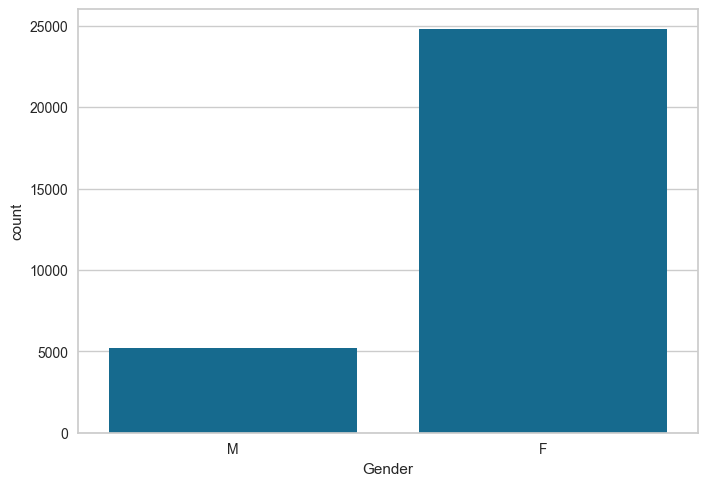

In [17]:
sns.countplot(data=data,x="Gender")
plt.show()

In [54]:
# overall order count

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

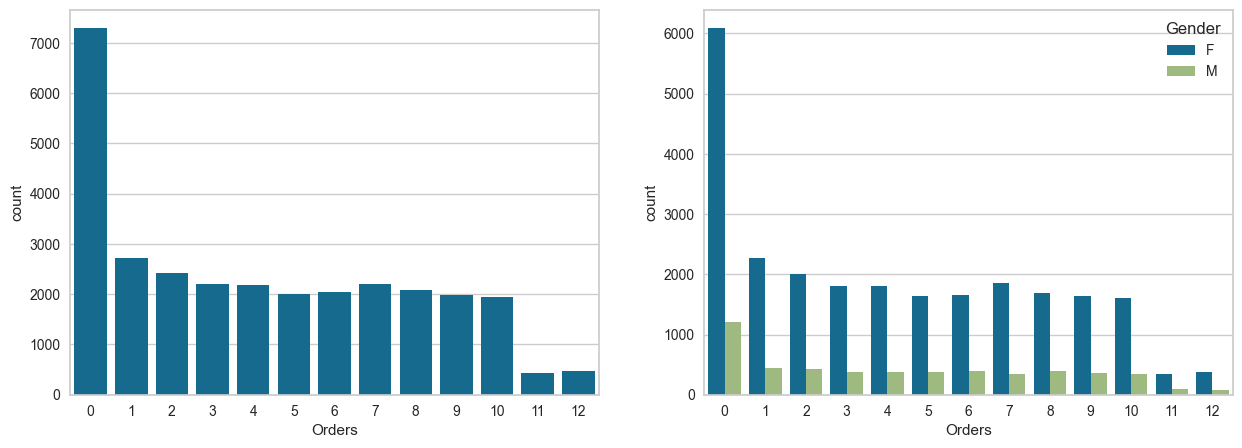

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x="Orders")
# order count by each gender
plt.subplot(1,2,2)
sns.countplot(data=data,x="Orders",hue="Gender")
plt.subtitle("overall order vs genderwise order")
plt.show()

In [62]:
# boxplot for orders and searches of each brands

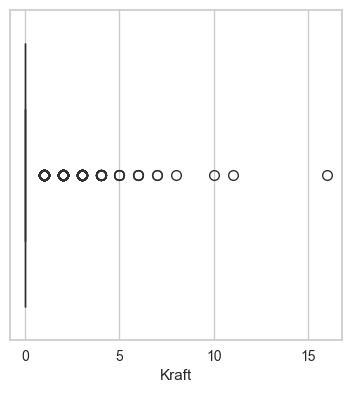

In [19]:
cols=list(data.columns[2:])
def dist_list(lst):
    plt.figure(figsize=(30,30))
    for i,col in enumerate(lst,1):
        plt.subplot(6,6,1)
    sns.boxplot(data=data,x=data[col])
dist_list(cols)
    

In [1]:
# correlation graphs

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(data.iloc[:,3].corr())
plt.show()

TypeError: Series.corr() missing 1 required positional argument: 'other'

<Figure size 2000x1500 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

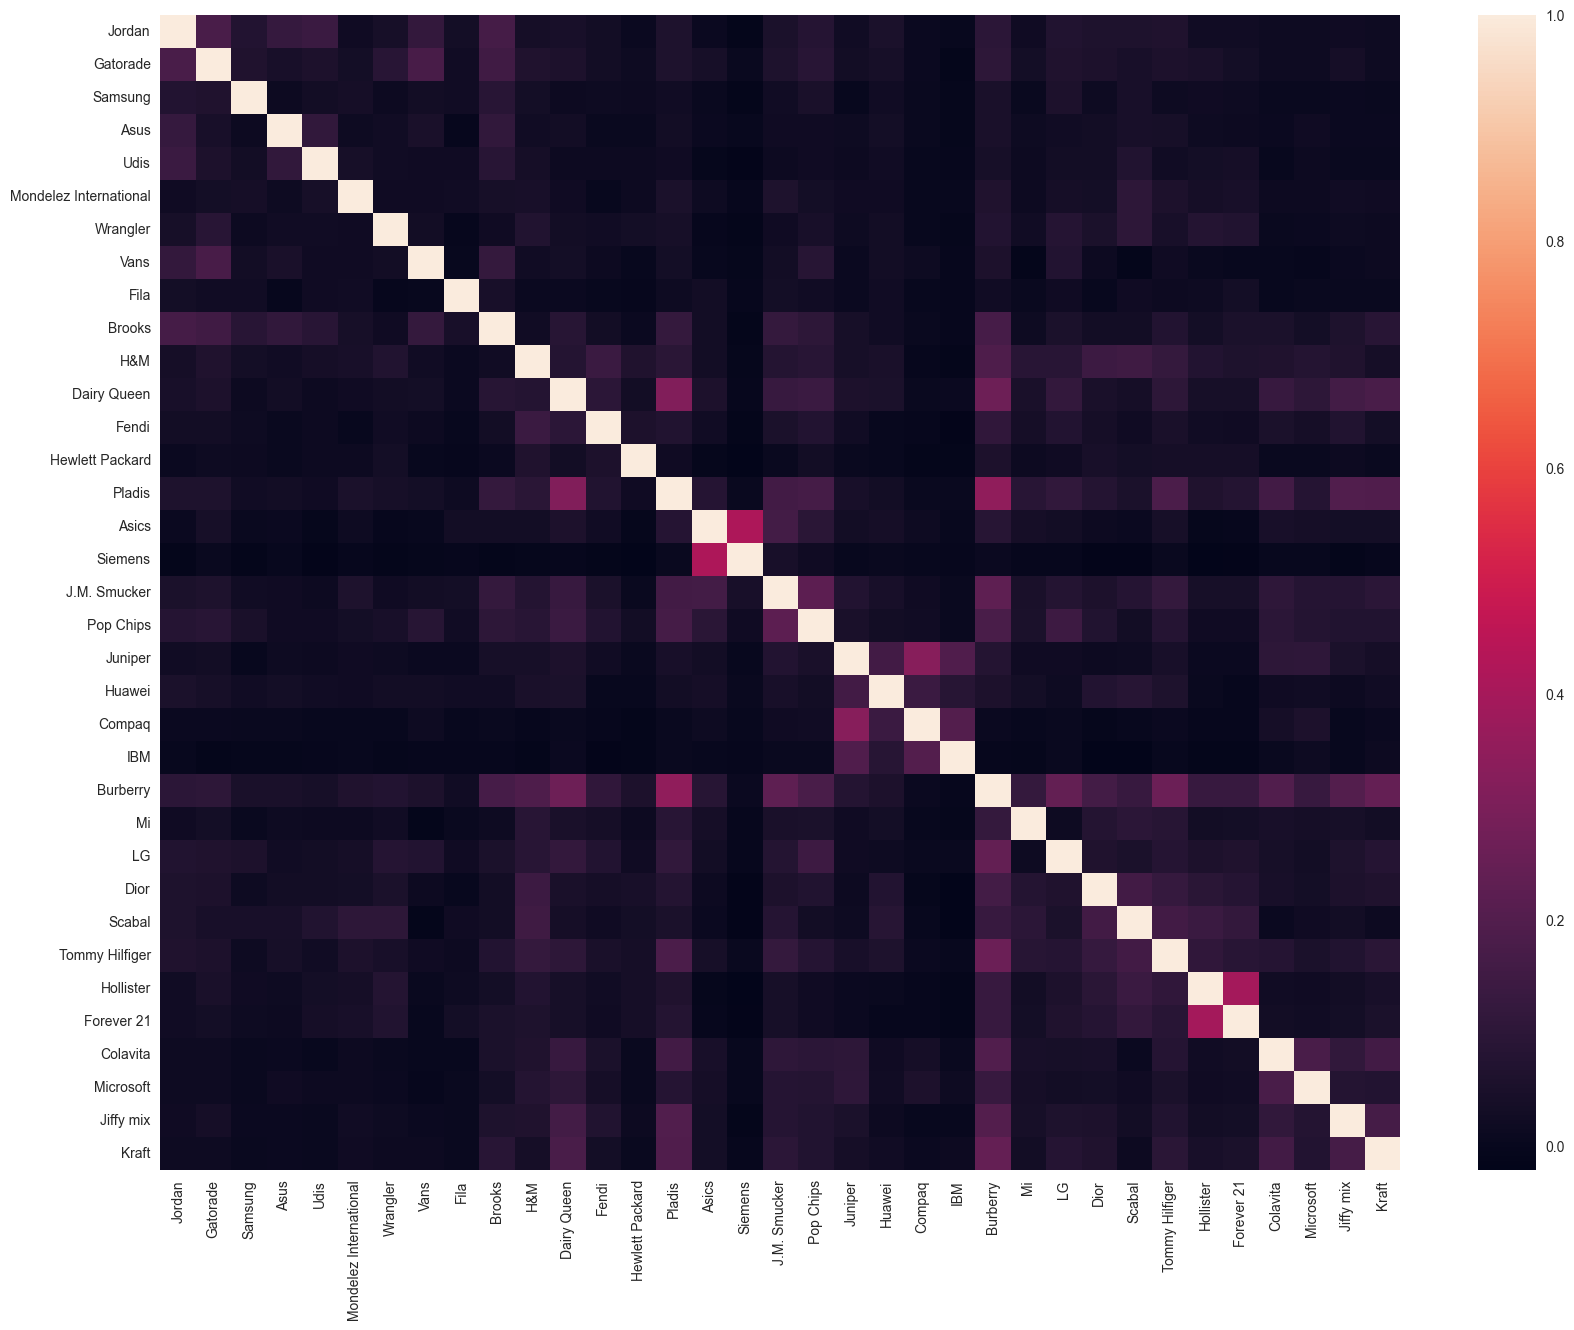

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(data.iloc[:,3:].corr())
plt.show()

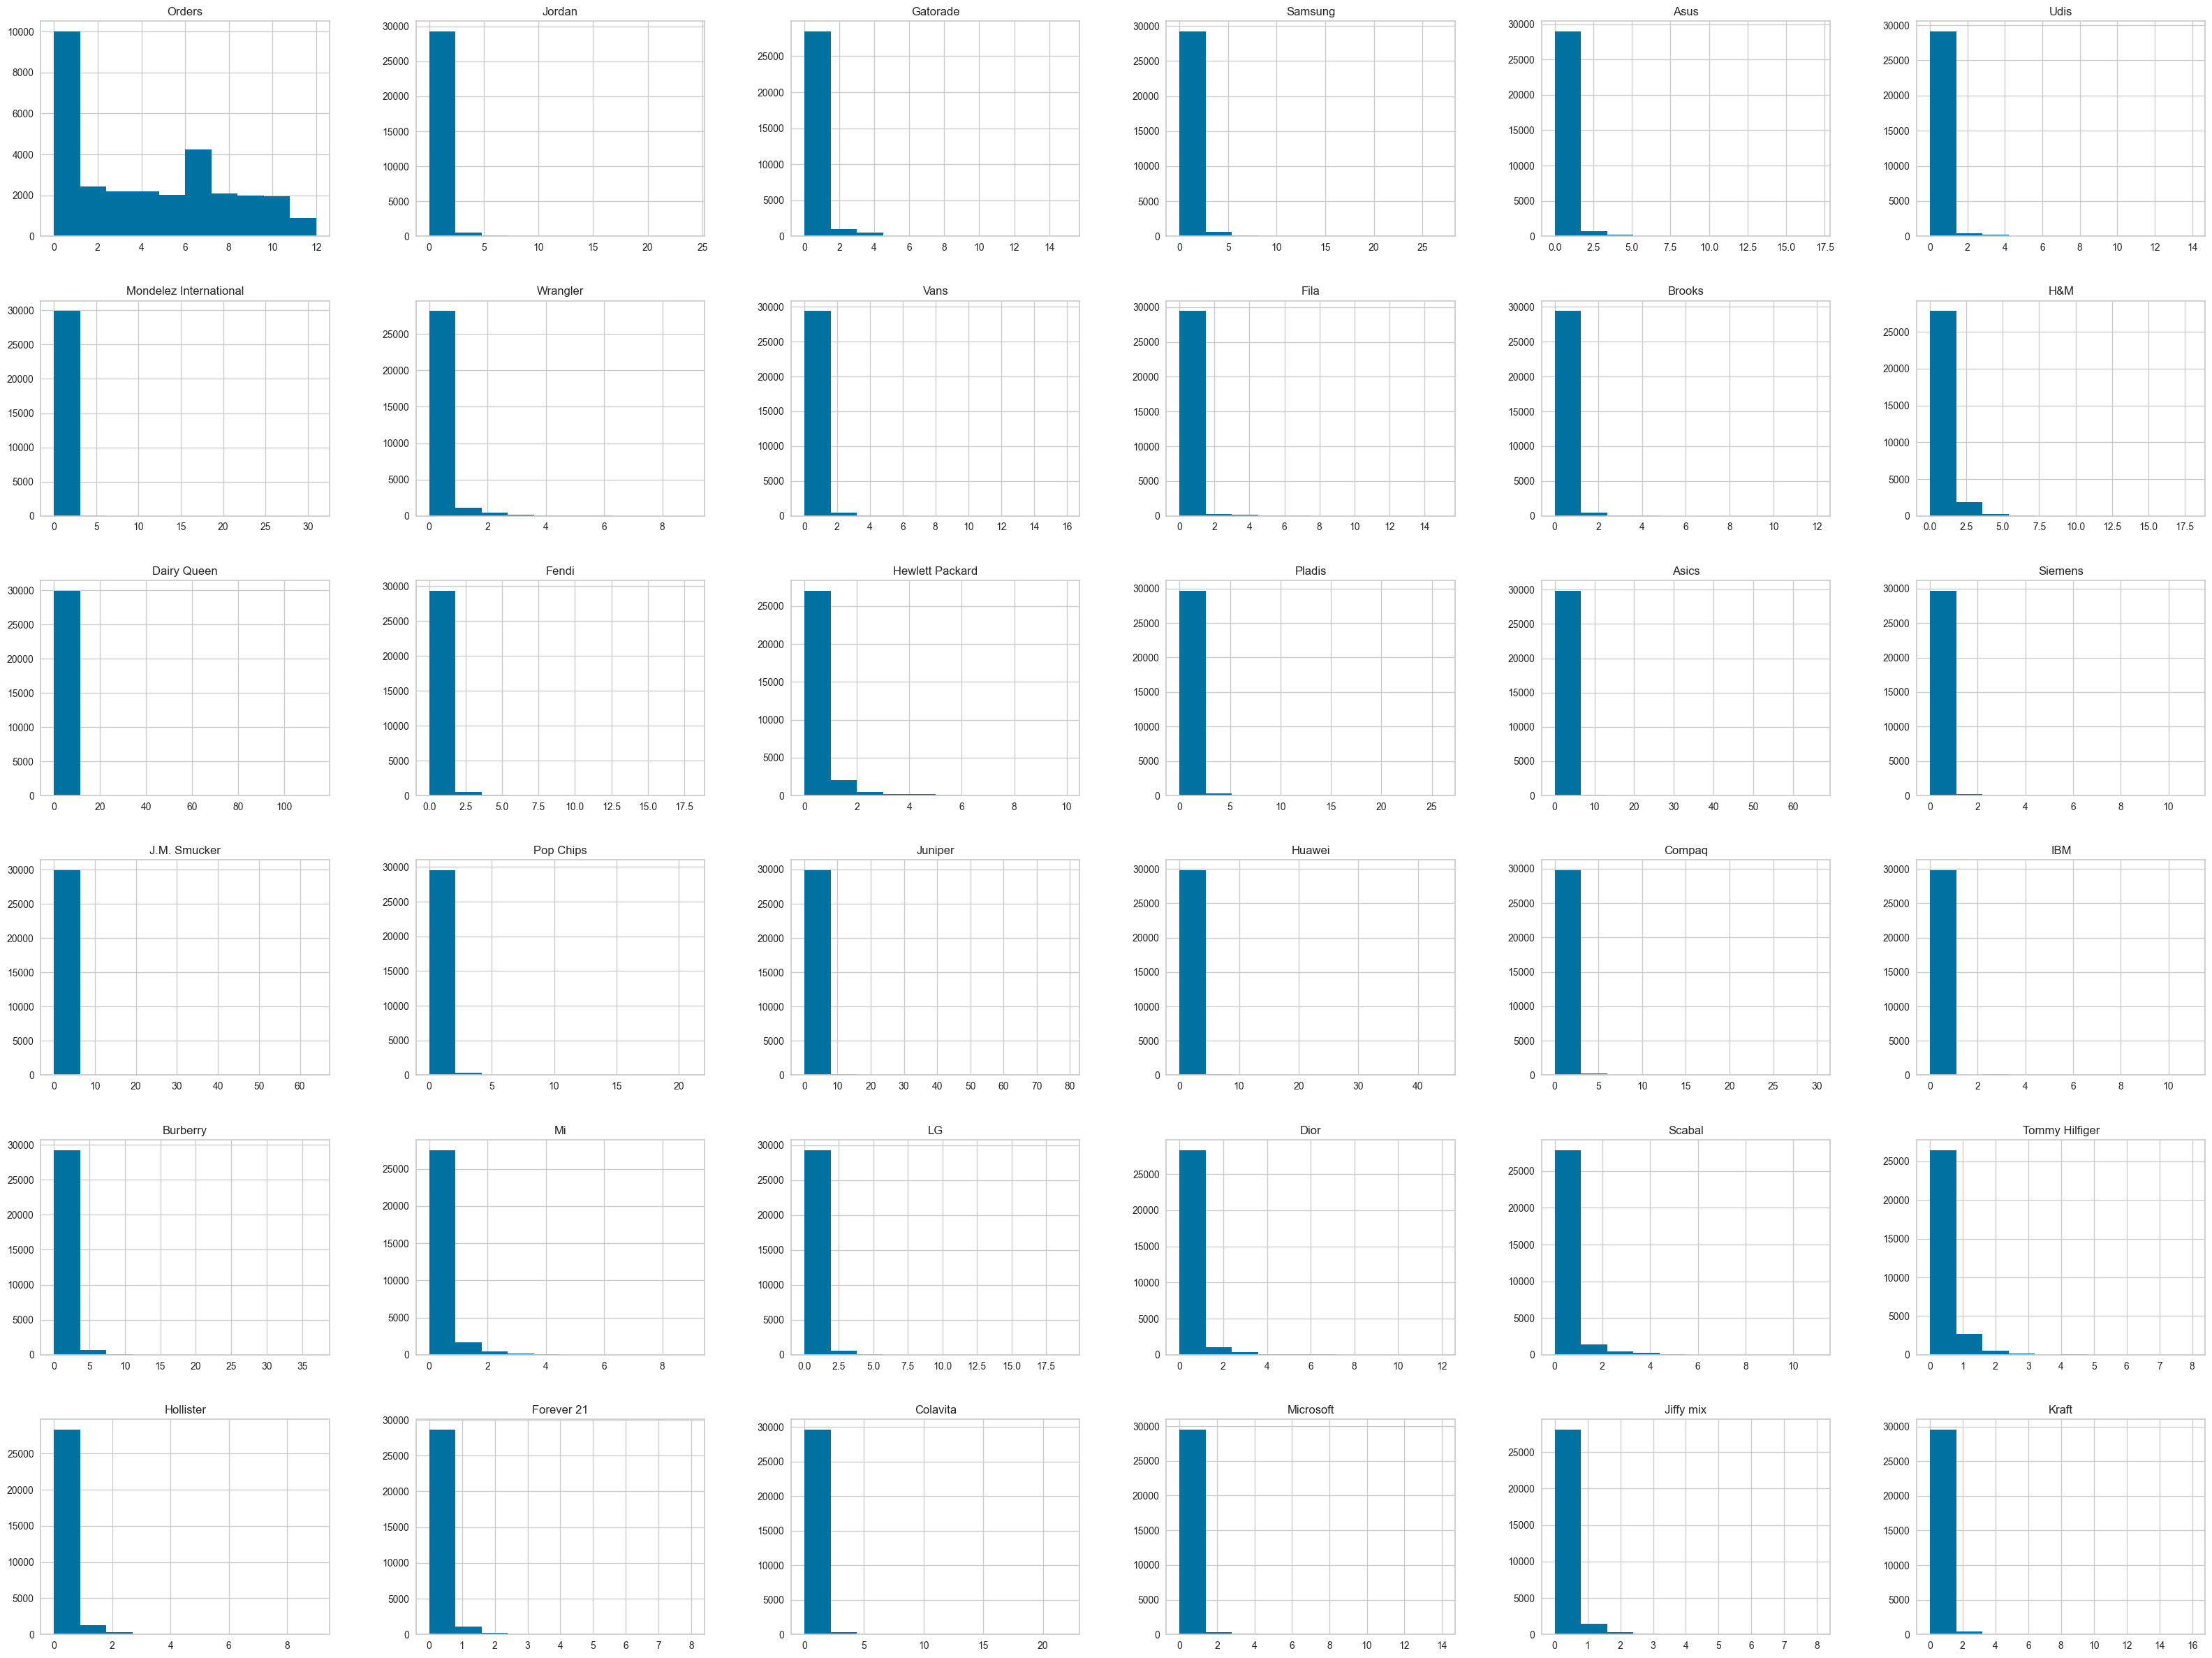

In [22]:
data.iloc[:,2:].hist(figsize=(40,30))
plt.show()

In [23]:
new_df=data.copy()

In [24]:
new_df["total search"]=new_df.iloc[:,3:].sum(axis=1)

In [25]:

new_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,16


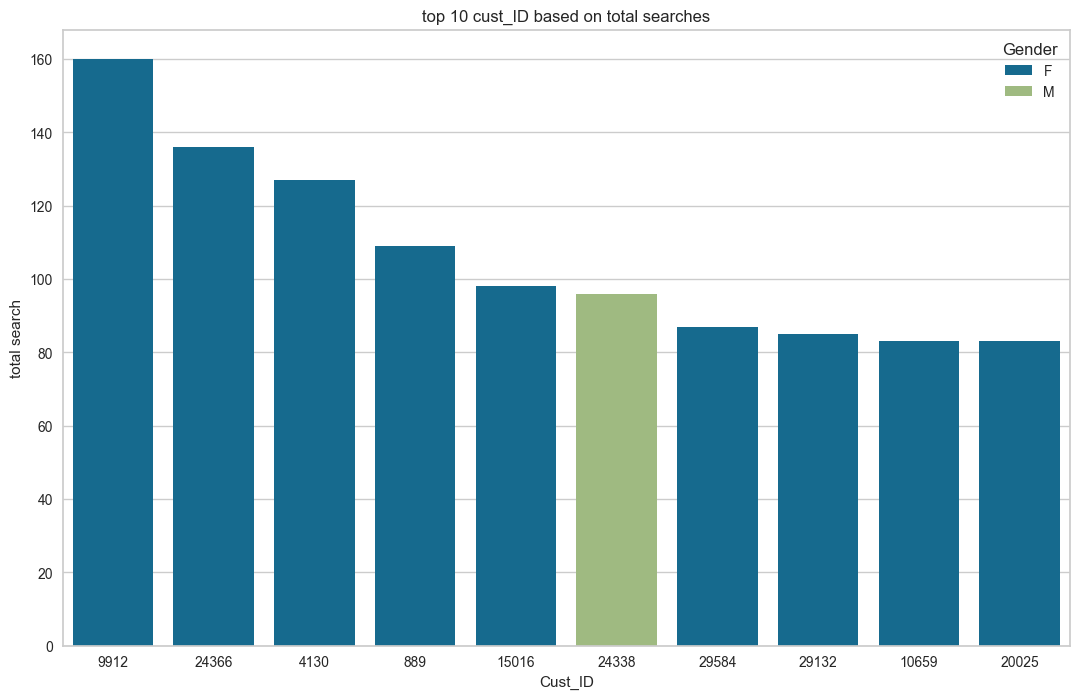

In [42]:
plt.figure(figsize=(13,8))
plt_data=new_df.sort_values("total search",ascending=False)[["Cust_ID","Gender","total search"]].head(10)
sns.barplot(data=plt_data,
            x="Cust_ID",
            y="total search",
            hue="Gender",
            order=plt_data.sort_values("total search",ascending=False).Cust_ID)
plt.title("top 10 cust_ID based on total searches")
plt.show()

In [43]:
# scaling

In [26]:
x=data.iloc[:,2:].values

In [27]:
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
scale=MinMaxScaler()
features=scale.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
inertia=[]
for i in range(1,16):
    k_means =KMeans(n_clusters=i)    
    k_means =k_means.fit(features)    
    inertia.append(k_means.inertia_)

In [49]:
# elbow graph

(Text(0.5, 0, 'no of clusters'), Text(0, 0.5, 'inertia'))

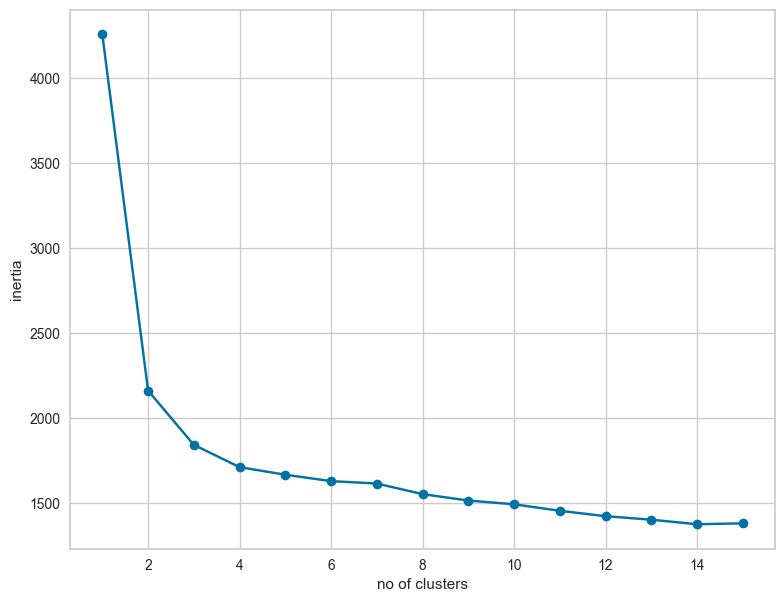

In [30]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia,'bo-')
plt.xlabel("no of clusters"), plt.ylabel("inertia")


In [51]:
# kelbow visualizer

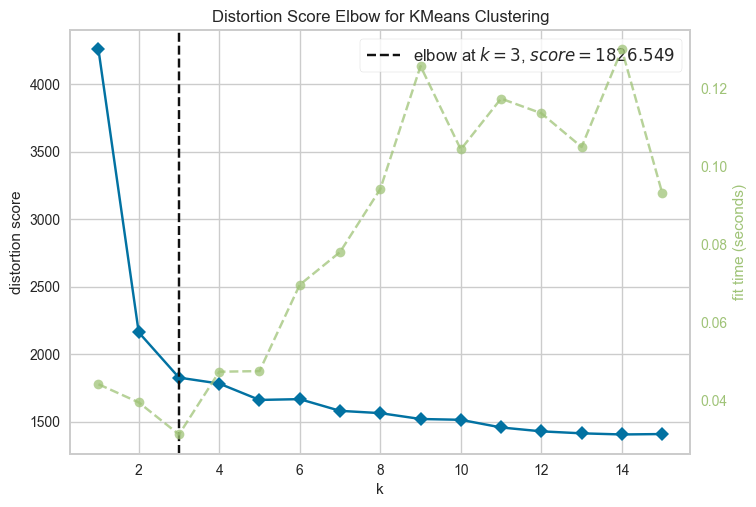

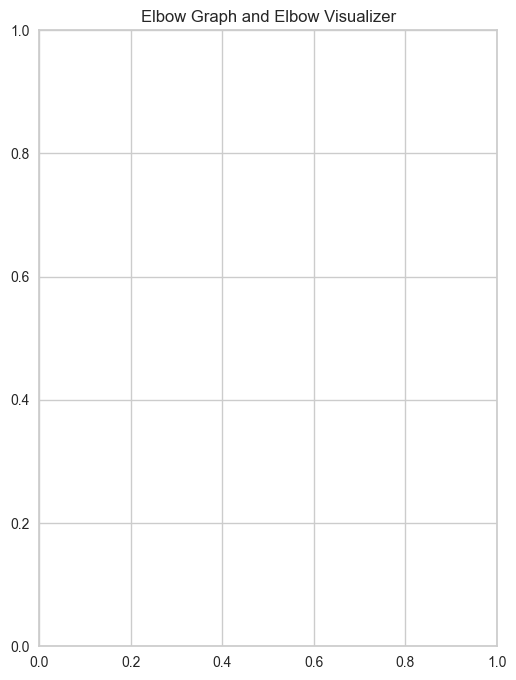

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming 'features' is your dataset
# Example for creating sample data if not already defined:
# from sklearn.datasets import make_blobs
# features, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=0)

# Initialize the KMeans model
kmeans = KMeans()

# Create the KElbowVisualizer with the number of clusters range
visualizer = KElbowVisualizer(kmeans, k=(1, 16))

# Fit the data to the visualizer
visualizer.fit(features)

# Create the plot
plt.figure(figsize=(13, 8))

# Subplot 1 (Elbow Graph)
plt.subplot(1, 2, 2)
plt.title("Elbow Graph and Elbow Visualizer")

# Show the elbow plot
visualizer.show()

plt.show()


In [32]:
silhouette_avg=[]
for i in range(2, 16):
    # Initialize kmeans
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(features)
    # Silhouette score
    silhouette_avg.append(silhouette_score(features, cluster_labels))



In [33]:
plt.show()

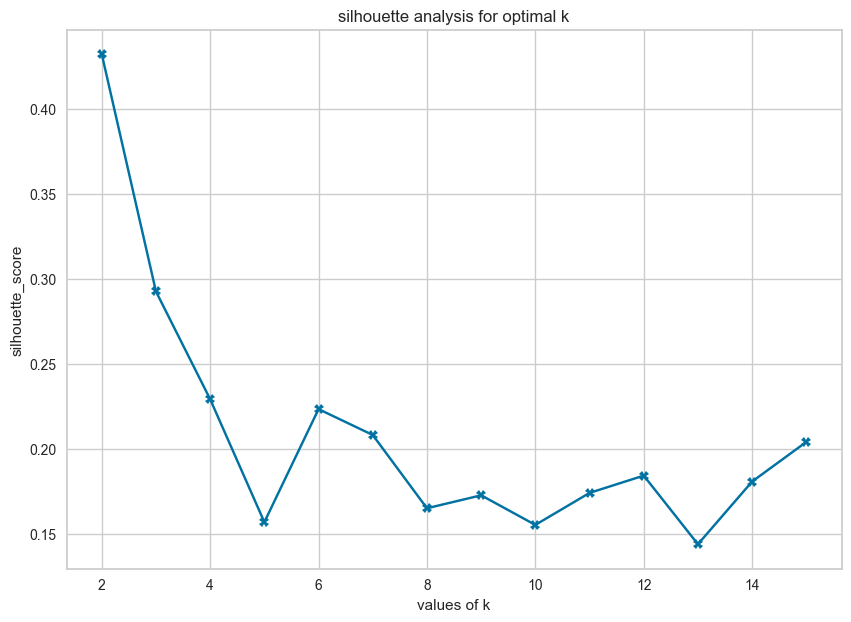

In [34]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg,'bX-')
plt.xlabel("values of k")
plt.ylabel("silhouette_score")
plt.title("silhouette analysis for optimal k")
plt.show()

In [35]:
model=KMeans(n_clusters=3)
model = model.fit(features)

In [36]:
y_km=model.predict(features)
centers=model.cluster_centers_

In [38]:
data['cluster']=pd.DataFrame(y_km)
data.to_csv("cluster_data",index=False)

In [40]:
data['cluster'].value_counts()

cluster
0    12432
1     9128
2     8440
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

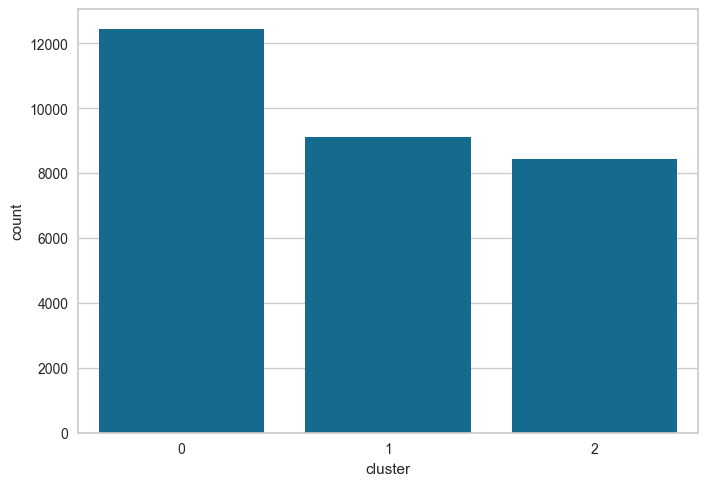

In [42]:
sns.countplot(data=data,x='cluster')

In [43]:
c_df=pd.read_csv('cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [44]:
c_df["total search"]=c_df.iloc[:,3:38].sum(axis=1)

In [45]:
cl_0=c_df.groupby(["cluster","Gender"],as_index=False).sum().query("cluster==0")

In [46]:
cl_0

,cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total search
0,0,F,154699357,6269,2470,1947,2086,1813,1632,1480,...,3041,4194,1807,847,654,1960,1153,870,776,70690
1,0,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


Text(0.5, 1.0, 'customers count')

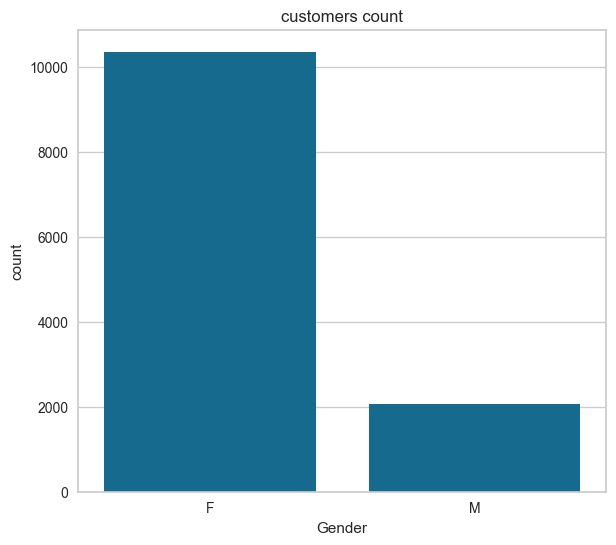

In [47]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query("cluster==0"),x="Gender")
plt.title("customers count")

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

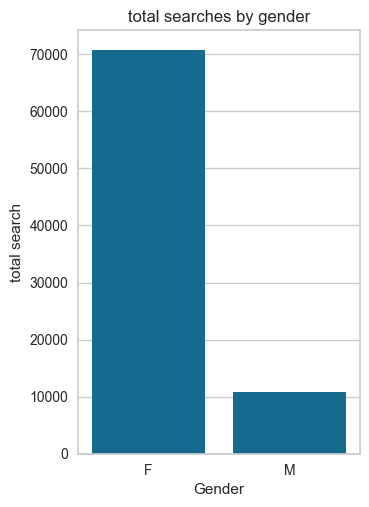

In [49]:
plt.subplot(1,2,2)
sns.barplot(data=cl_0,x="Gender",y="total search")
plt.title("total searches by gender")
plt.subtitle('no. of customers and their total searches in "cluster 0"')
plt.show()

In [51]:
cl_2=c_df.groupby(['cluster','Gender'],as_index=False).sum().query('cluster==2')
cl_2

,cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total search
4,2,F,106470376,30755,1923,1603,1725,1414,1185,1108,...,2039,3092,1196,649,463,1335,865,665,491,51550
5,2,M,21374453,6894,521,748,321,22,55,147,...,246,104,117,56,41,294,193,110,110,8543


Text(0.5, 1.0, 'customers count')

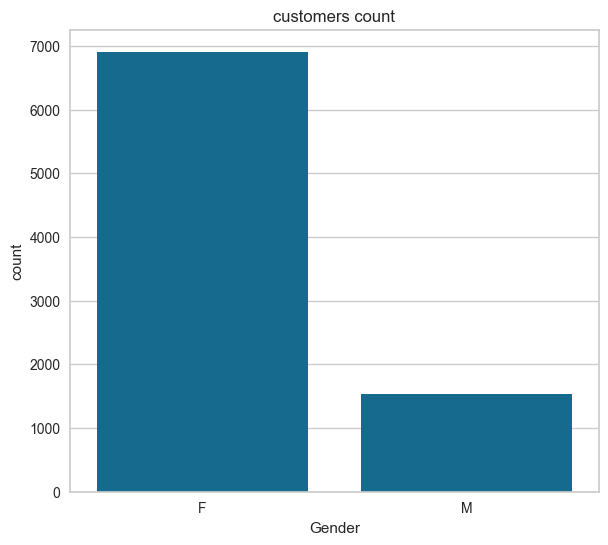

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('cluster==2'),x="Gender")
plt.title("customers count")

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

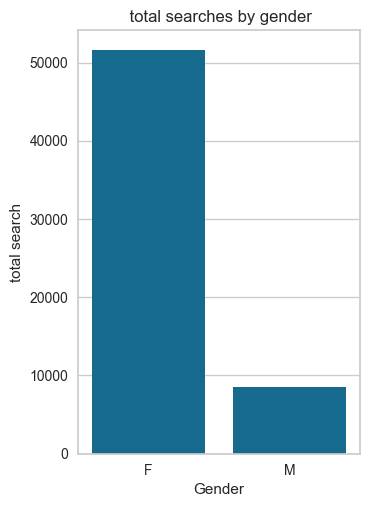

In [55]:
plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y="total search")
plt.title(" total searches by gender")
plt.subtitle('no. of customers and their total searches in "cluster 2" ')
plt.show()

In [56]:
final_df=c_df.groupby(['cluster'],as_index=False).sum()
final_df

,cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,total search
0,0,182944741,FFFFFFFFMFFMFFFFFFFFFFFFFFFFFFFFFFMFMMMFFFFFFF...,7560,3071,2724,2521,1825,1707,1642,...,3324,4369,1979,930,709,2346,1339,1030,918,81477
1,1,139225430,MMFMFFFFMFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFF...,79885,2508,2495,2121,1579,1359,1296,...,2525,3537,1477,695,507,1791,1094,836,608,64573
2,2,127844829,FFFFFFFFFFMMFMFMFFFFFFFFFFFFMFFFMFFFFFFFFFMFFF...,37649,2444,2351,2046,1436,1240,1255,...,2285,3196,1313,705,504,1629,1058,775,601,60093


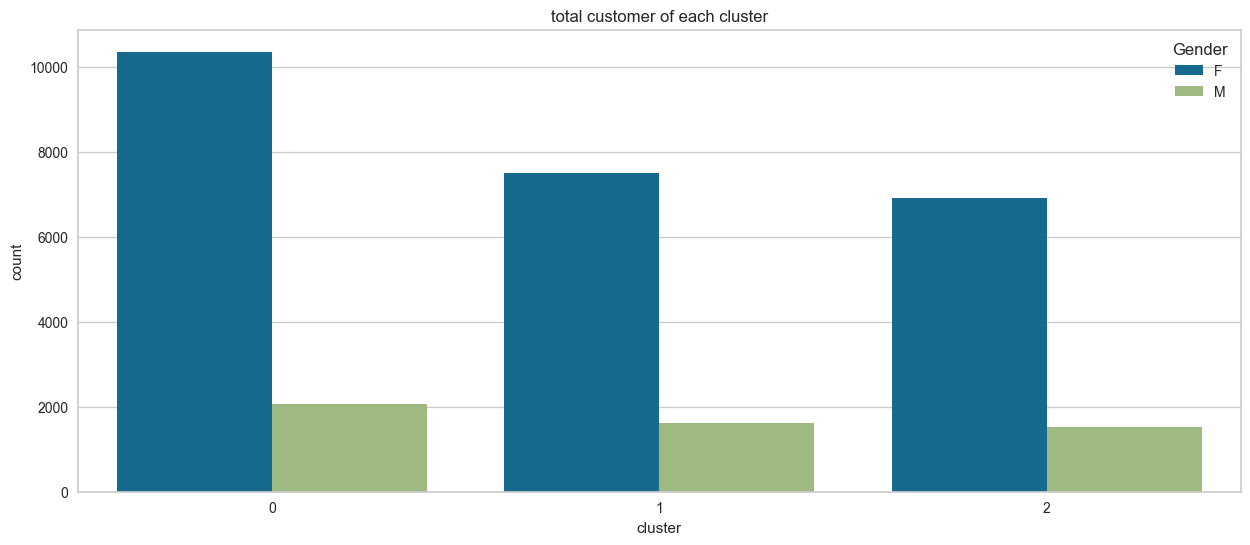

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='cluster',hue="Gender")
plt.title("total customer of each cluster")
plt.show()

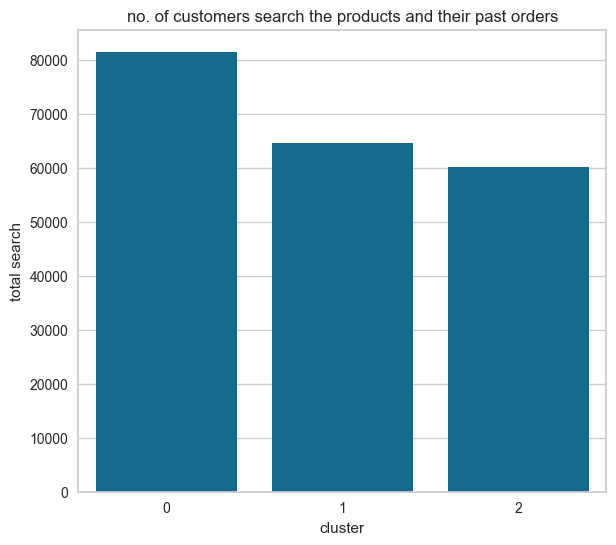

In [58]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='cluster',y='total search')
plt.title("no. of customers search the products and their past orders")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

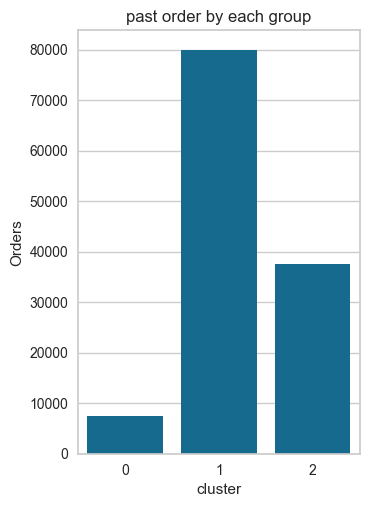

In [59]:
plt.subplot(1,2,2)
sns.barplot(data=final_df,x='cluster',y='Orders')
plt.title('past order by each group')
plt.subtitle("no. of times customer searched the products and their past orders")
plt.show()


In [ ]:
# conclusion